# Exploring Dandiset 000673: Control of working memory by phase–amplitude coupling of human hippocampal neurons

*This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please be cautious when interpreting the code or results.*

## Overview of Dandiset 000673

This Dandiset contains electrophysiological recordings from human medial temporal lobe (including hippocampus) and frontal lobe during a working memory task. The study investigates how theta-gamma phase-amplitude coupling (TG-PAC) in the hippocampus coordinates with frontal activity to support working memory processes.

The research demonstrates that interactions between frontal control and hippocampal persistent activity are coordinated by theta-gamma phase-amplitude coupling (TG-PAC). The recordings include single neurons in the human medial temporal and frontal lobe while patients maintained multiple items in working memory using a Sternberg task paradigm. The data shows that in the hippocampus, TG-PAC indicated working memory load and quality, with certain neurons selectively spiking during nonlinear interactions of theta phase and gamma amplitude.

The findings support a multicomponent architecture of working memory, with frontal control managing the maintenance of working memory content in storage-related areas. This data is valuable for understanding the neural mechanisms of working memory and cognitive control in humans.

**Neurosift Link**: [https://neurosift.app/dandiset/000673](https://neurosift.app/dandiset/000673)

**Public Repository for Code**: [https://github.com/rutishauserlab/SBCAT-release-NWB](https://github.com/rutishauserlab/SBCAT-release-NWB)

## What this notebook covers

In this notebook, we will:

1. Load and explore the Dandiset metadata
2. Examine the structure of the NWB files in the dataset
3. Load and visualize LFP (Local Field Potential) data from electrodes in the hippocampus
4. Explore the trial structure of the Sternberg working memory task
5. Analyze the relationship between behavioral performance and neural data
6. Visualize single unit activity and examine its relationship to task phases
7. Explore stimulus presentation and behavioral responses

This notebook aims to provide an overview of the data and basic analyses to help you get started with your own investigation of this Dandiset.

## Required packages

The following packages are required to run this notebook:

In [1]:
# Data handling
import numpy as np
import pandas as pd
import h5py
import remfile

# DANDI and NWB specific packages
import pynwb
from dandi.dandiapi import DandiAPIClient

# Visualization
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.gridspec import GridSpec
import seaborn as sns

# Signal processing
from scipy import signal

# Display settings
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings
sns.set_theme()  # Set the seaborn theme for plotting
%matplotlib inline

## Loading the Dandiset using the DANDI API

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000673")
assets = list(dandiset.get_assets())

# Get metadata
metadata = dandiset.get_metadata()
# Print basic information
print(f"Dandiset ID: {dandiset.identifier}")
print(f"Dandiset name: {metadata.name}")
print(f"Found {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path} ({asset.size / 1e6:.1f} MB)")

Dandiset ID: 000673
Dandiset name: Data for: Control of working memory by phase–amplitude coupling of human hippocampal neurons
Found 44 assets in the dataset

First 5 assets:
- sub-11/sub-11_ses-1_ecephys+image.nwb (679.2 MB)
- sub-12/sub-12_ses-1_ecephys+image.nwb (518.9 MB)
- sub-1/sub-1_ses-1_ecephys+image.nwb (745.8 MB)
- sub-1/sub-1_ses-2_ecephys+image.nwb (690.5 MB)
- sub-10/sub-10_ses-1_ecephys+image.nwb (519.3 MB)


## Loading and exploring an NWB file

We will examine a specific NWB file from subject 26, session 1. This file includes LFP recordings, spike data from sorted units, trial information, and stimulus metadata for a Sternberg working memory task.

In [3]:
# Define the asset ID for the file we want to examine
asset_id = "f6184d11-80b0-46a0-b96a-5217a3a65356"  # sub-26/sub-26_ses-1_ecephys+image.nwb
asset_url = f"https://api.dandiarchive.org/api/assets/{asset_id}/download/"

# Load the NWB file
remote_file = remfile.File(asset_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print(f"NWB file identifier: {nwb.identifier}")
print(f"Session description: {nwb.session_description}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject age: {nwb.subject.age}")
print(f"Subject sex: {nwb.subject.sex}")
print(f"Subject species: {nwb.subject.species}")
print(f"Institution: {nwb.institution}")
print(f"Lab: {nwb.lab}")

NWB file identifier: sub-26_ses-1_P101TWH
Session description: SBCAT_ID: 26
Subject ID: 26
Subject age: P25Y
Subject sex: F
Subject species: Homo sapiens
Institution: Cedars-Sinai Medical Center
Lab: Rutishauser


## Exploring the Experiment Description

Let's examine the detailed description of the experiment to understand the protocol and task structure.

In [4]:
print(nwb.experiment_description)

This data contains electrophysiological recordings and behavior from the Sternberg task performed in patients with intractable epilepsy implanted with depth electrodes and Behnke-Fried microwires in the human medial temporal lobe and medial frontal cortex.


## Examining Electrode Information

Let's look at the electrodes that were used to record the LFP and spike data. This will help us understand the anatomical regions that were recorded from.

In [5]:
# Create a dataframe of electrode information
electrodes_df = nwb.electrodes.to_dataframe()
print(f"Total number of electrodes: {len(electrodes_df)}")

# Display electrode locations
location_counts = electrodes_df['location'].value_counts()
print("\nElectrode locations:")
for location, count in location_counts.items():
    print(f"- {location}: {count} electrodes")

# Display a sample of the electrodes dataframe
electrodes_df.head()

Total number of electrodes: 37

Electrode locations:
- hippocampus_left: 15 electrodes
- hippocampus_right: 14 electrodes
- amygdala_right: 7 electrodes
- amygdala_left: 1 electrodes


,x,y,z,location,filtering,group,group_name,origChannel
id,,,,,,,,
0,-21.19,-23.47,-15.08,hippocampus_left,300-3000Hz,NLX-microwires-129 pynwb.ecephys.ElectrodeGrou...,micros,129.0
1,-21.19,-23.47,-15.08,hippocampus_left,300-3000Hz,NLX-microwires-130 pynwb.ecephys.ElectrodeGrou...,micros,130.0
2,-21.19,-23.47,-15.08,hippocampus_left,300-3000Hz,NLX-microwires-131 pynwb.ecephys.ElectrodeGrou...,micros,131.0
3,-21.19,-23.47,-15.08,hippocampus_left,300-3000Hz,NLX-microwires-132 pynwb.ecephys.ElectrodeGrou...,micros,132.0
4,-21.19,-23.47,-15.08,hippocampus_left,300-3000Hz,NLX-microwires-133 pynwb.ecephys.ElectrodeGrou...,micros,133.0


## Examining Trial Information

The experiment used a Sternberg working memory task. Let's examine the trial structure to understand the task better.

In [6]:
# Create a dataframe of trial information
trials_df = nwb.trials.to_dataframe()
print(f"Total number of trials: {len(trials_df)}")
print(f"Columns in trial data: {', '.join(trials_df.columns)}")

# Look at the first few trials
trials_df[['loads', 'response_accuracy', 'probe_in_out']].head()

Total number of trials: 140
Columns in trial data: loads, PicIDs_Encoding1, PicIDs_Encoding2, PicIDs_Encoding3, PicIDs_Probe, start_time, stop_time, timestamps_FixationCross, timestamps_Encoding1, timestamps_Encoding1_end, timestamps_Encoding2, timestamps_Encoding2_end, timestamps_Encoding3, timestamps_Encoding3_end, timestamps_Maintenance, timestamps_Probe, timestamps_Response, response_accuracy, probe_in_out


,loads,response_accuracy,probe_in_out
id,,,
0,3,1,1
1,3,1,1
2,3,1,1
3,1,1,1
4,3,1,0


### Analyzing Trial Performance

Let's analyze the behavioral performance across different memory loads.

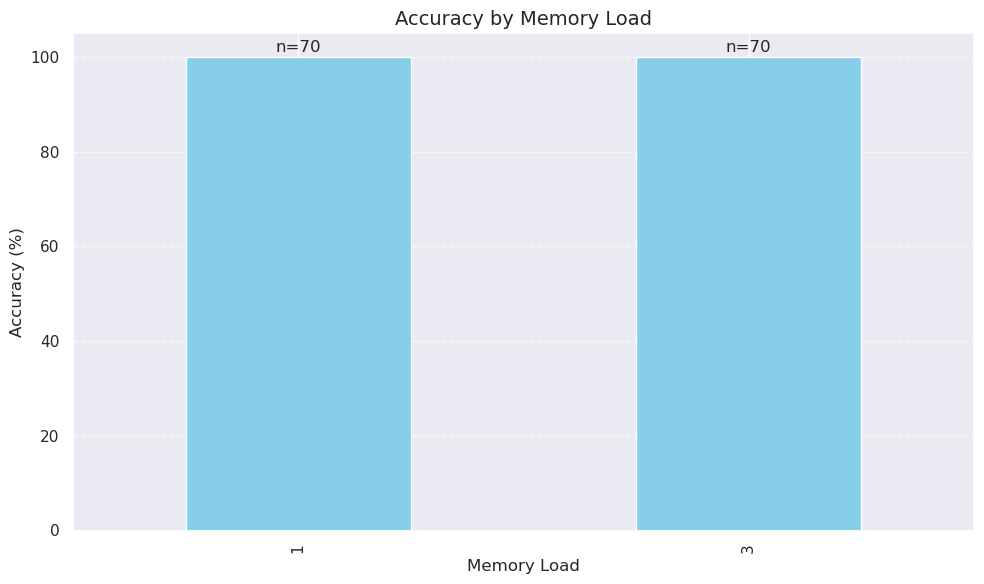

In [7]:
# Group trials by load and calculate accuracy
performance_by_load = trials_df.groupby('loads')['response_accuracy'].mean() * 100
trial_counts = trials_df.groupby('loads').size()

# Create a bar plot of accuracy by load
plt.figure(figsize=(10, 6))
ax = performance_by_load.plot(kind='bar', color='skyblue')
plt.title('Accuracy by Memory Load', fontsize=14)
plt.xlabel('Memory Load', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add trial counts to the bars
for i, (count, acc) in enumerate(zip(trial_counts, performance_by_load)):
    plt.text(i, acc+1, f"n={count}", ha='center')
    
plt.ylim([0, 105])  # Set y-axis limits
plt.tight_layout()

## Looking at the Trial Timeline

Let's visualize the timeline of a single trial to understand the structure of the Sternberg task.

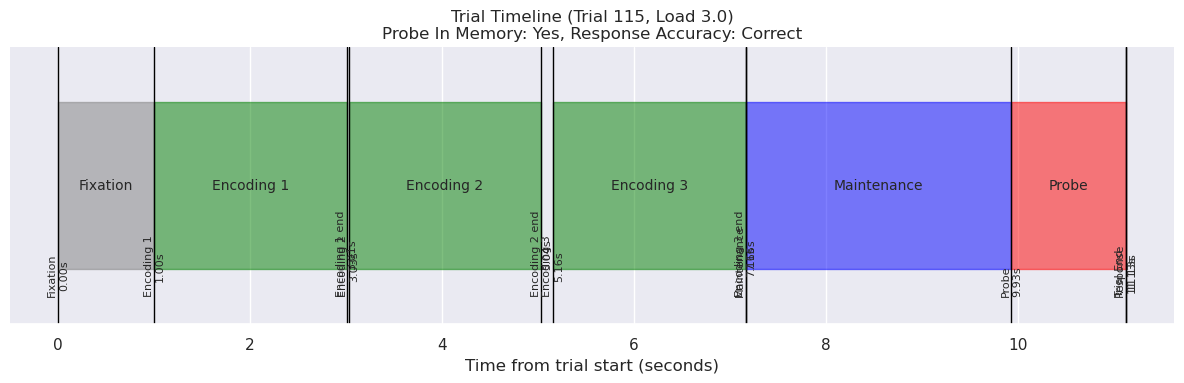

In [8]:
# Select a random trial with memory load of 3 (the highest load)
load3_trials = trials_df[trials_df['loads'] == 3]
sample_trial_idx = np.random.choice(load3_trials.index)
sample_trial = trials_df.loc[sample_trial_idx]

# Create a timeline visualization
fig, ax = plt.subplots(figsize=(12, 4))

# Define events and their times
events = [
    ('Fixation', sample_trial['timestamps_FixationCross']),
    ('Encoding 1', sample_trial['timestamps_Encoding1']),
    ('Encoding 1 end', sample_trial['timestamps_Encoding1_end']),
    ('Encoding 2', sample_trial['timestamps_Encoding2']),
    ('Encoding 2 end', sample_trial['timestamps_Encoding2_end']),
    ('Encoding 3', sample_trial['timestamps_Encoding3']),
    ('Encoding 3 end', sample_trial['timestamps_Encoding3_end']),
    ('Maintenance', sample_trial['timestamps_Maintenance']),
    ('Probe', sample_trial['timestamps_Probe']),
    ('Response', sample_trial['timestamps_Response']),
    ('Trial End', sample_trial['stop_time'])
]

# Adjust timing to be relative to trial start
trial_start = sample_trial['start_time']
events = [(name, time - trial_start) for name, time in events]

# Plot the timeline
colors = {
    'Fixation': 'gray',
    'Encoding 1': 'green',
    'Encoding 2': 'green',
    'Encoding 3': 'green',
    'Maintenance': 'blue',
    'Probe': 'red',
    'Response': 'purple'
}

last_time = 0
for i, (name, time) in enumerate(events):
    if 'end' not in name and 'End' not in name and i < len(events) - 1:
        # Determine width of segment
        next_time = events[i+1][1]
        width = next_time - time
        if width > 0:  # Only plot if width is positive
            color = colors.get(name, 'gray')
            ax.add_patch(patches.Rectangle((time, 0.2), width, 0.6, color=color, alpha=0.5))
            # Add a text label in the middle of the segment
            ax.text(time + width/2, 0.5, name, ha='center', va='center', fontsize=10)
    
    # Plot vertical line for each event
    ax.axvline(x=time, color='black', linestyle='-', linewidth=1)
    ax.text(time, 0.1, f"{name}\n{time:.2f}s", ha='center', va='bottom', fontsize=8, rotation=90)
    last_time = max(last_time, time)

# Set plot limits and labels
ax.set_xlim(-0.5, last_time + 0.5)
ax.set_ylim(0, 1)
ax.set_yticks([])
ax.set_xlabel('Time from trial start (seconds)')
ax.set_title(f'Trial Timeline (Trial {sample_trial_idx}, Load {sample_trial["loads"]})\n' +
            f'Probe In Memory: {"Yes" if sample_trial["probe_in_out"] == 1 else "No"}, ' +
            f'Response Accuracy: {"Correct" if sample_trial["response_accuracy"] == 1 else "Incorrect"}')
ax.spines[['left', 'top', 'right']].set_visible(False)

plt.tight_layout()

## Loading and Visualizing LFP Data

Now let's look at the LFP data recorded during the task. We'll examine data from the hippocampus electrodes.

In [9]:
# Get LFP data
lfp = nwb.acquisition['LFPs']
print(f"LFP data shape: {lfp.data.shape}")
print(f"Sampling rate: {lfp.rate} Hz")
print(f"Starting time: {lfp.starting_time} seconds")

# Get electrode information to find hippocampal electrodes
lfp_electrodes_df = lfp.electrodes.table.to_dataframe()
print("\nLFP electrodes locations:")
for location, count in lfp_electrodes_df['location'].value_counts().items():
    print(f"- {location}: {count} electrodes")

# Filter for hippocampus electrodes
hippocampus_electrodes = lfp_electrodes_df[lfp_electrodes_df['location'].str.contains('hippocampus')]
hippocampus_electrodes_indices = hippocampus_electrodes.index.tolist()
print(f"\nFound {len(hippocampus_electrodes_indices)} hippocampus electrodes")

LFP data shape: (617421, 36)
Sampling rate: 400.0 Hz
Starting time: 0.0024855 seconds

LFP electrodes locations:
- hippocampus_left: 15 electrodes
- hippocampus_right: 14 electrodes
- amygdala_right: 7 electrodes
- amygdala_left: 1 electrodes

Found 29 hippocampus electrodes


Let's visualize the LFP data from a hippocampal electrode during a trial with a memory load of 3.

Selected electrode: index 0
Location: hippocampus_left
Group name: micros


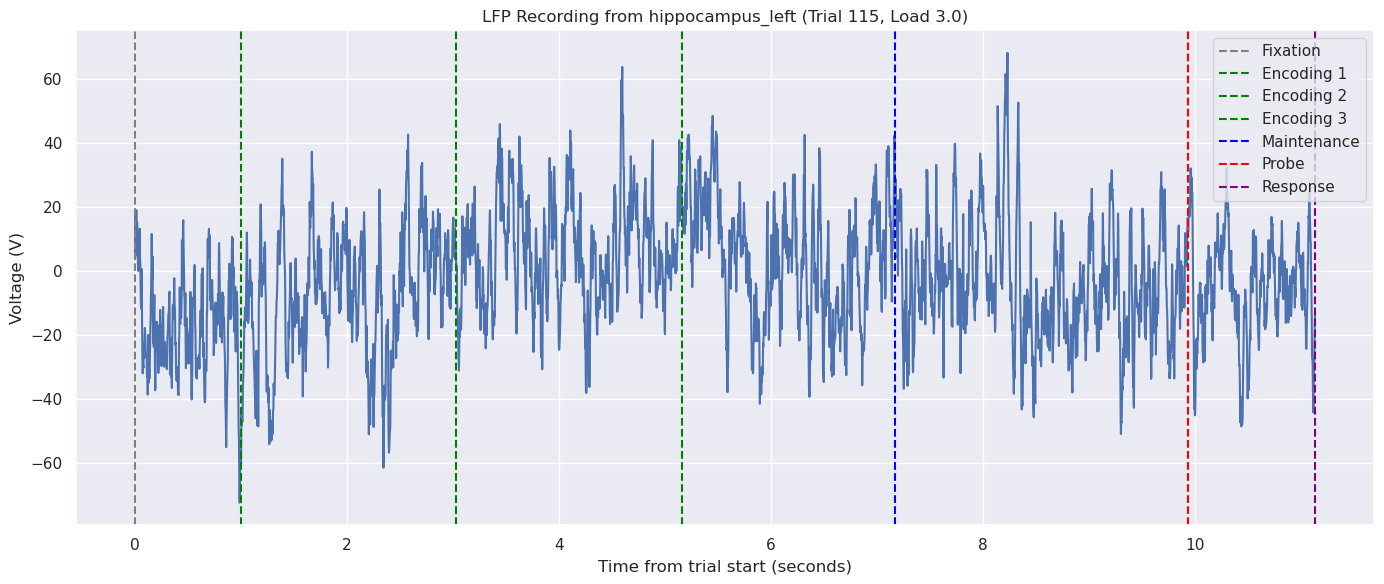

In [10]:
# Select a hippocampal electrode for visualization
electrode_idx = hippocampus_electrodes_indices[0]  # Choose the first hippocampal electrode
electrode_info = hippocampus_electrodes.iloc[0]
print(f"Selected electrode: index {electrode_idx}")
print(f"Location: {electrode_info['location']}")
print(f"Group name: {electrode_info['group_name']}")

# Select the same sample trial from before
sample_trial = trials_df.loc[sample_trial_idx]

# Calculate sample indices for this trial
sampling_rate = lfp.rate
start_idx = int((sample_trial['start_time'] - lfp.starting_time) * sampling_rate)
end_idx = int((sample_trial['stop_time'] - lfp.starting_time) * sampling_rate)

# Ensure indices are within valid range
start_idx = max(0, start_idx)
end_idx = min(lfp.data.shape[0] - 1, end_idx)

# Get the LFP data for this trial and electrode
lfp_trial = lfp.data[start_idx:end_idx, electrode_idx]
time_axis = np.linspace(0, (end_idx - start_idx) / sampling_rate, len(lfp_trial))

# Plot the LFP data
plt.figure(figsize=(14, 6))
plt.plot(time_axis, lfp_trial)
plt.xlabel('Time from trial start (seconds)')
plt.ylabel('Voltage (V)')
plt.title(f'LFP Recording from {electrode_info["location"]} (Trial {sample_trial_idx}, Load {sample_trial["loads"]})')

# Add vertical lines for key trial events
events = [
    ('Fixation', sample_trial['timestamps_FixationCross'] - sample_trial['start_time']),
    ('Encoding 1', sample_trial['timestamps_Encoding1'] - sample_trial['start_time']),
    ('Encoding 2', sample_trial['timestamps_Encoding2'] - sample_trial['start_time']),
    ('Encoding 3', sample_trial['timestamps_Encoding3'] - sample_trial['start_time']),
    ('Maintenance', sample_trial['timestamps_Maintenance'] - sample_trial['start_time']),
    ('Probe', sample_trial['timestamps_Probe'] - sample_trial['start_time']),
    ('Response', sample_trial['timestamps_Response'] - sample_trial['start_time'])
]

colors = {
    'Fixation': 'gray',
    'Encoding 1': 'green',
    'Encoding 2': 'green',
    'Encoding 3': 'green',
    'Maintenance': 'blue',
    'Probe': 'red',
    'Response': 'purple'
}

for name, time in events:
    plt.axvline(x=time, color=colors.get(name, 'black'), linestyle='--', label=name)

# Create a legend without duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right')

plt.tight_layout()

## Time-Frequency Analysis of LFP Data

Now let's perform a time-frequency analysis to look at the different frequency bands in the LFP signal during the task.

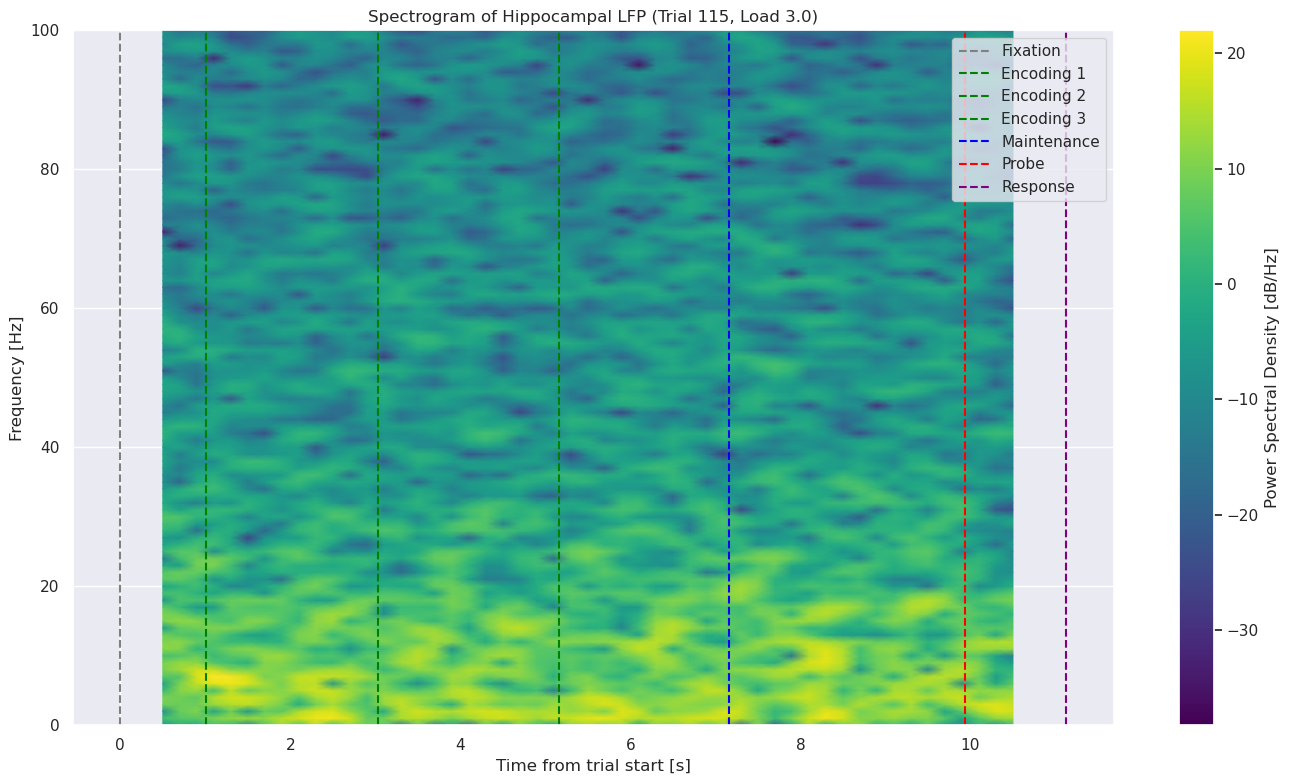

In [11]:
# Compute the spectrogram for the hippocampal LFP data
frequencies = np.linspace(1, 100, 100)  # Frequencies from 1 to 100 Hz
window = signal.windows.hann(int(sampling_rate))  # 1-second Hann window
nperseg = int(sampling_rate)  # 1-second segments
noverlap = int(nperseg * 0.8)  # 80% overlap

f, t, Sxx = signal.spectrogram(
    lfp_trial, 
    fs=sampling_rate, 
    window=window, 
    nperseg=nperseg, 
    noverlap=noverlap, 
    nfft=int(sampling_rate), 
    detrend='constant'
)

# Filter frequencies up to 100 Hz
mask = f <= 100
f = f[mask]
Sxx = Sxx[mask, :]

# Convert to dB scale
Sxx_db = 10 * np.log10(Sxx)

# Plot the spectrogram
plt.figure(figsize=(14, 8))
plt.pcolormesh(t, f, Sxx_db, shading='gouraud', cmap='viridis')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time from trial start [s]')
plt.colorbar(label='Power Spectral Density [dB/Hz]')
plt.title(f'Spectrogram of Hippocampal LFP (Trial {sample_trial_idx}, Load {sample_trial["loads"]})')

# Add vertical lines for key trial events
for name, time in events:
    plt.axvline(x=time, color=colors.get(name, 'black'), linestyle='--', label=name)

# Create a legend without duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right')

plt.tight_layout()

## Examining Unit Activity

Now let's look at the spiking activity of individual neurons recorded in this session.

Total number of units: 21

Examining unit properties:
Available unit properties: spike_times, electrodes, clusterID_orig, waveforms, waveforms_mean_snr, waveforms_peak_snr, waveforms_isolation_distance, waveforms_mean_proj_dist

Units summary statistics:
waveforms_mean_snr: mean=1.29, min=0.77, max=2.38
waveforms_peak_snr: mean=5.30, min=3.42, max=10.40
waveforms_isolation_distance: mean=228.64, min=8.25, max=2450.20


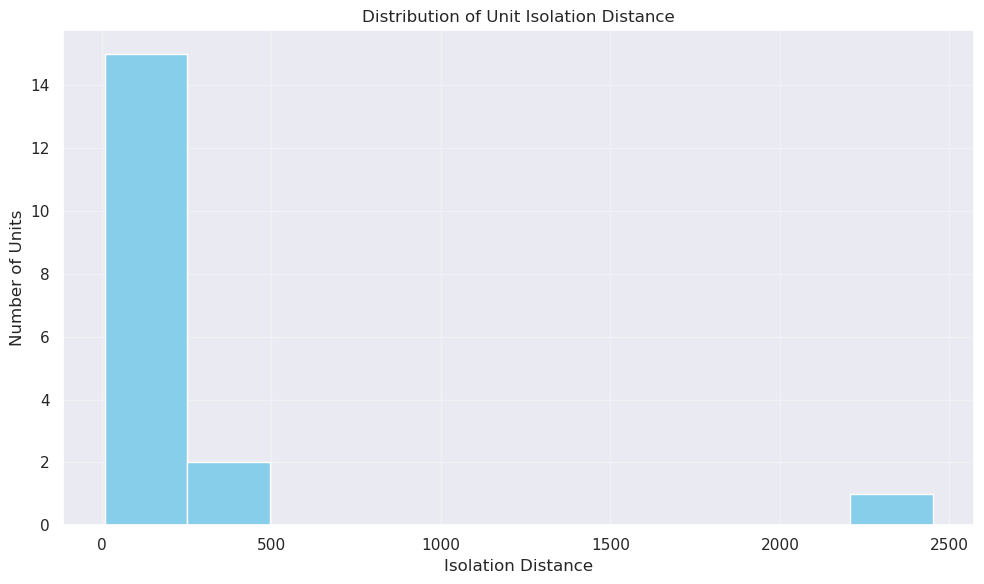

In [12]:
# Get information about the recorded units
units_df = nwb.units.to_dataframe()
print(f"Total number of units: {len(units_df)}")

# Let's simplify this section to avoid electrode location mapping issues
print("\nExamining unit properties:")
print(f"Available unit properties: {', '.join(units_df.columns)}")

# Show basic unit information
print(f"\nUnits summary statistics:")
for col in ['waveforms_mean_snr', 'waveforms_peak_snr', 'waveforms_isolation_distance']:
    if col in units_df.columns:
        print(f"{col}: mean={units_df[col].mean():.2f}, min={units_df[col].min():.2f}, max={units_df[col].max():.2f}")

# Plot distribution of unit quality metrics
if 'waveforms_isolation_distance' in units_df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(units_df['waveforms_isolation_distance'].dropna(), bins=10, color='skyblue')
    plt.title('Distribution of Unit Isolation Distance')
    plt.xlabel('Isolation Distance')
    plt.ylabel('Number of Units')
    plt.grid(alpha=0.3)
    plt.tight_layout()

Let's visualize the spiking activity of a hippocampal unit during our sample trial.

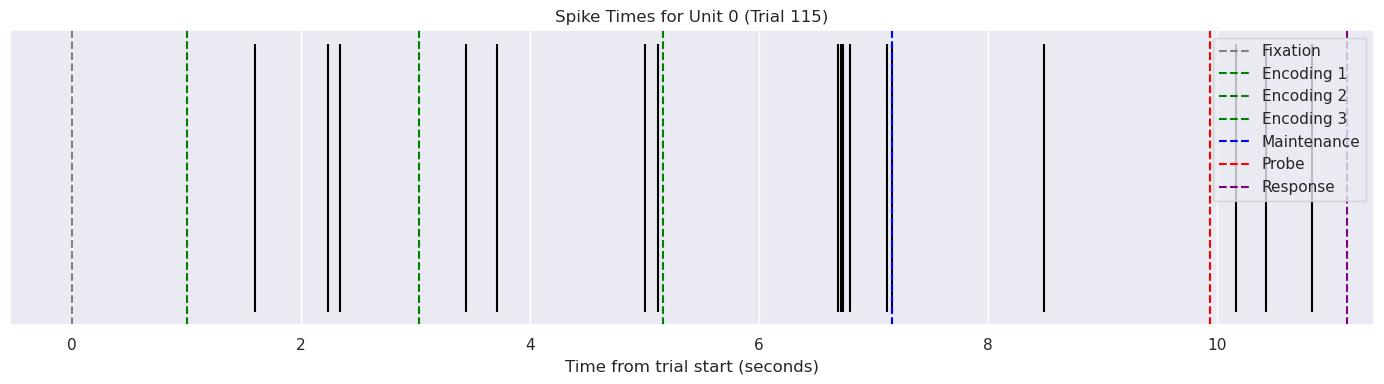

In [13]:
# Select the first unit for visualization (regardless of location)
unit_idx = 0  # Use the first unit in the dataset
unit_id = units_df.index[unit_idx]
    
# Get spike times for this unit
spike_times = nwb.units['spike_times'][unit_idx]

# Filter spike times for our sample trial
trial_start_time = sample_trial['start_time']
trial_end_time = sample_trial['stop_time']
trial_duration = trial_end_time - trial_start_time

mask = (spike_times >= trial_start_time) & (spike_times <= trial_end_time)
trial_spike_times = spike_times[mask] - trial_start_time  # Relative to trial start

# Create the raster plot
plt.figure(figsize=(14, 4))
plt.vlines(trial_spike_times, 0, 1, color='black')
plt.xlabel('Time from trial start (seconds)')
plt.yticks([])
plt.title(f'Spike Times for Unit {unit_id} (Trial {sample_trial_idx})')

# Add vertical lines for key trial events
for name, time in events:
    plt.axvline(x=time, color=colors.get(name, 'black'), linestyle='--', label=name)

# Create a legend without duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right')

plt.tight_layout()

## Comparing Neural Activity Across Memory Loads

Now let's compare neural activity across different memory loads to see if there are differences in firing patterns.

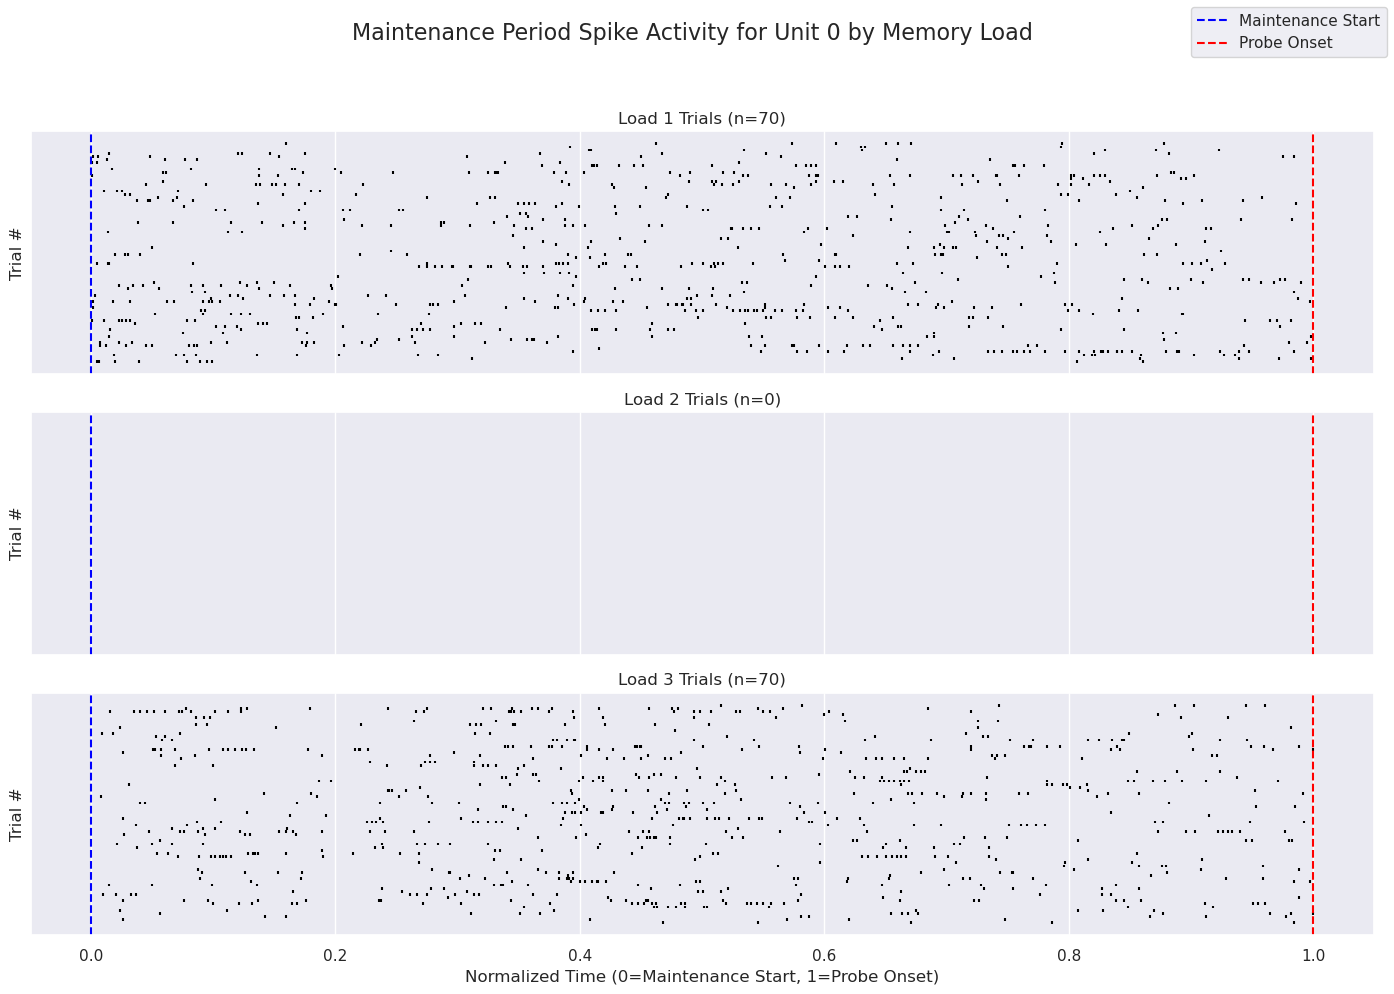

In [14]:
# Get all trials with different loads
load1_trials = trials_df[trials_df['loads'] == 1]
load2_trials = trials_df[trials_df['loads'] == 2]
load3_trials = trials_df[trials_df['loads'] == 3]

# Function to get spikes during the maintenance period
def get_maintenance_spikes(unit_idx, trials):
    unit_spike_times = nwb.units['spike_times'][unit_idx]
    maintenance_spikes = []
    
    for _, trial in trials.iterrows():
        # Define maintenance period
        maintenance_start = trial['timestamps_Maintenance']
        if trial['loads'] == 1:
            encoding_end = trial['timestamps_Encoding1_end']
        elif trial['loads'] == 2:
            encoding_end = trial['timestamps_Encoding2_end']
        else:
            encoding_end = trial['timestamps_Encoding3_end']
        probe_start = trial['timestamps_Probe']
        
        # Calculate duration between encoding end and maintenance start
        encoding_to_maintenance = maintenance_start - encoding_end
        
        # Calculate duration of maintenance period
        maintenance_duration = probe_start - maintenance_start
        
        # Get spikes during maintenance
        mask = (unit_spike_times >= maintenance_start) & (unit_spike_times <= probe_start)
        trial_spikes = unit_spike_times[mask]
        
        # Store normalized times (relative to maintenance start)
        normalized_spikes = [(t - maintenance_start) / maintenance_duration for t in trial_spikes]
        maintenance_spikes.append((trial.name, encoding_to_maintenance, maintenance_duration, normalized_spikes))
    
    return maintenance_spikes

# Get maintenance spikes for each load (using the same unit as before)
load1_spikes = get_maintenance_spikes(unit_idx, load1_trials)
load2_spikes = get_maintenance_spikes(unit_idx, load2_trials)
load3_spikes = get_maintenance_spikes(unit_idx, load3_trials)

# Create a figure with subplots for each load
fig, axes = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

# Plot raster for load 1 trials
ax = axes[0]
for i, (trial_id, _, _, spikes) in enumerate(load1_spikes):
    if spikes:  # Only plot if there are spikes
        ax.vlines(spikes, i, i+0.9, color='black')
ax.set_title(f'Load 1 Trials (n={len(load1_spikes)})')
ax.set_ylabel('Trial #')
ax.set_yticks([])

# Plot raster for load 2 trials
ax = axes[1]
for i, (trial_id, _, _, spikes) in enumerate(load2_spikes):
    if spikes:  # Only plot if there are spikes
        ax.vlines(spikes, i, i+0.9, color='black')
ax.set_title(f'Load 2 Trials (n={len(load2_spikes)})')
ax.set_ylabel('Trial #')
ax.set_yticks([])

# Plot raster for load 3 trials
ax = axes[2]
for i, (trial_id, _, _, spikes) in enumerate(load3_spikes):
    if spikes:  # Only plot if there are spikes
        ax.vlines(spikes, i, i+0.9, color='black')
ax.set_title(f'Load 3 Trials (n={len(load3_spikes)})')
ax.set_ylabel('Trial #')
ax.set_yticks([])

# Set common labels
axes[2].set_xlabel('Normalized Time (0=Maintenance Start, 1=Probe Onset)')
plt.suptitle(f'Maintenance Period Spike Activity for Unit {unit_id} by Memory Load', fontsize=16)

# Add vertical lines at 0 and 1
for ax in axes:
    ax.axvline(x=0, color='blue', linestyle='--', label='Maintenance Start')
    ax.axvline(x=1, color='red', linestyle='--', label='Probe Onset')

# Create a legend
handles, labels = axes[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), loc='upper right')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Make room for the suptitle

## Visualizing Stimulus Images

The Sternberg task involves memorizing visual stimuli. Let's look at some examples of the stimulus images used in the task.

Number of stimulus images: 281
First 10 image IDs: ['image_101', 'image_102', 'image_103', 'image_104', 'image_105', 'image_106', 'image_107', 'image_108', 'image_109', 'image_110']


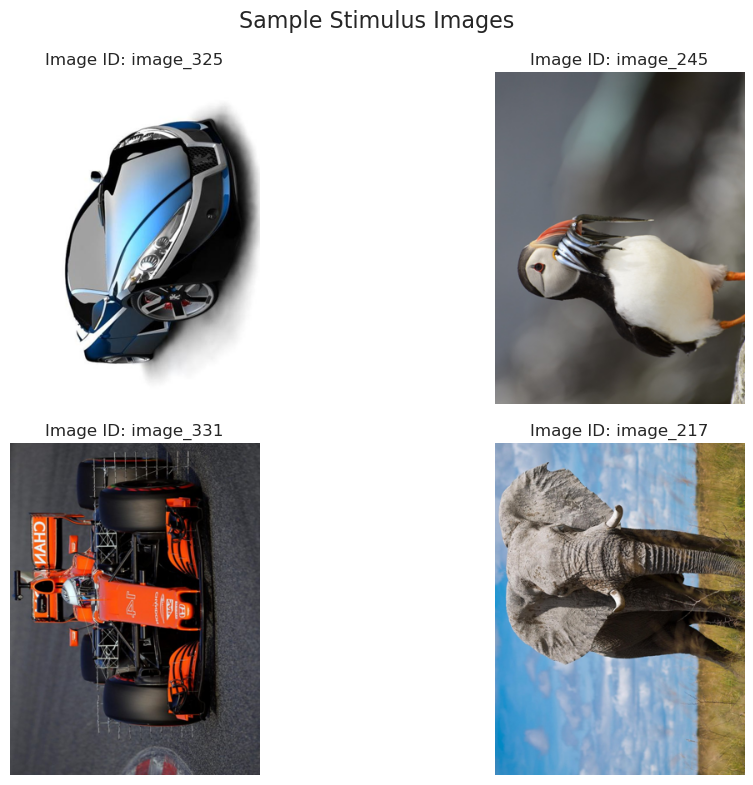

In [15]:
# Get stimulus templates
stimulus_templates = nwb.stimulus_template['StimulusTemplates']
print(f"Number of stimulus images: {len(stimulus_templates.images)}")

# Get a list of image IDs
image_ids = list(stimulus_templates.images.keys())
print(f"First 10 image IDs: {image_ids[:10]}")

# Sample a few images to display
sample_image_ids = np.random.choice(image_ids, size=min(4, len(image_ids)), replace=False)

plt.figure(figsize=(12, 8))
for i, img_id in enumerate(sample_image_ids):
    plt.subplot(2, 2, i+1)
    # Images are stored as RGB values
    img_data = stimulus_templates.images[img_id].data[:]
    plt.imshow(img_data)
    plt.title(f"Image ID: {img_id}")
    plt.axis('off')

plt.suptitle('Sample Stimulus Images', fontsize=16)
plt.tight_layout()

## Analyzing Stimulus Presentations

Let's look at the relationship between stimulus presentations and neural activity.

In [16]:
# Get stimulus presentation information
stimulus_presentations = nwb.stimulus['StimulusPresentation']
print(f"Number of stimulus presentations: {len(stimulus_presentations.data)}")
print(f"Number of unique images shown: {len(np.unique(stimulus_presentations.data))}")

# Convert to a DataFrame for easier analysis
stim_df = pd.DataFrame({
    'image_index': stimulus_presentations.data[:],
    'timestamp': stimulus_presentations.timestamps[:]
})

# Match image indices to image IDs
image_id_mapping = {}
for i, img_id in enumerate(stimulus_templates.order_of_images[:]):
    image_id_mapping[i] = img_id

stim_df['image_id'] = stim_df['image_index'].map(image_id_mapping)

# Display a sample of stimulus presentations
stim_df.head()

Number of stimulus presentations: 560
Number of unique images shown: 281


,image_index,timestamp,image_id
0,58,1.114844,"([[54, 60, 58], [54, 60, 58], [52, 60, 57], [5..."
1,1,3.180874,"([[1, 13, 31], [1, 12, 30], [1, 9, 28], [2, 10..."
2,226,5.348186,"([[66, 65, 9], [69, 67, 7], [88, 78, 9], [90, ..."
3,226,10.025340,"([[66, 65, 9], [69, 67, 7], [88, 78, 9], [90, ..."
4,59,13.876995,"([[2, 9, 2], [1, 8, 1], [1, 8, 1], [1, 8, 1], ..."


Let's examine the pattern of image presentations across the experiment.

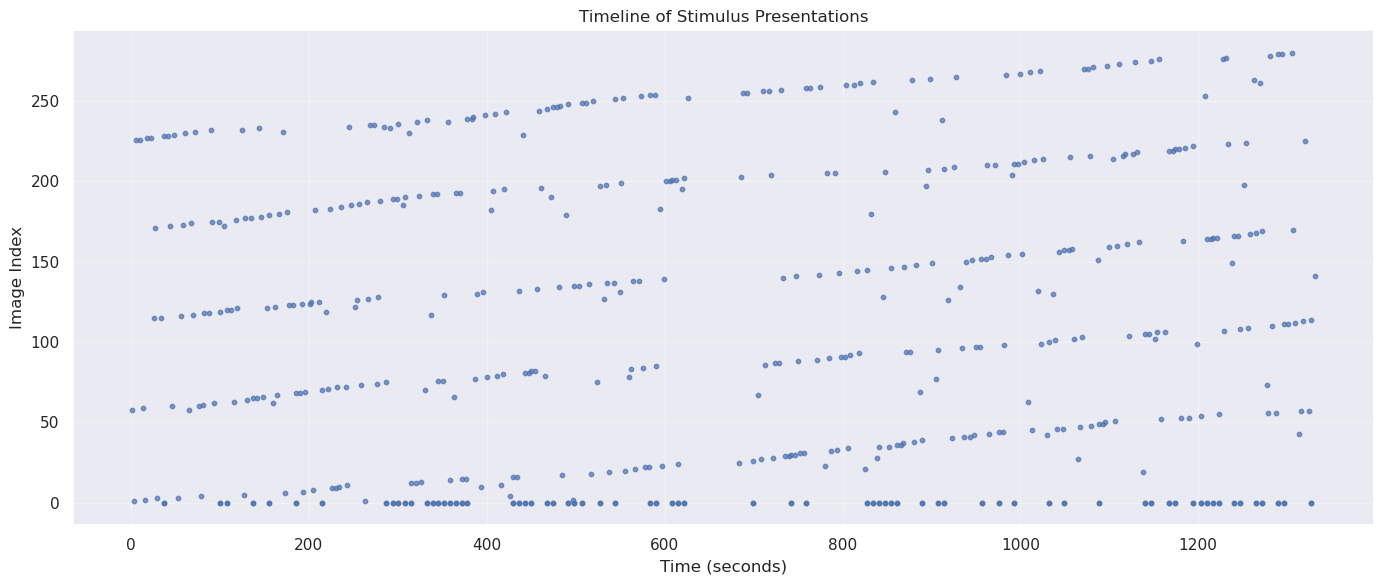

In [17]:
# Plot a timeline of stimulus presentations
plt.figure(figsize=(14, 6))

# Create a scatter plot of image indices over time
plt.scatter(stim_df['timestamp'], stim_df['image_index'], alpha=0.7, s=10)

plt.xlabel('Time (seconds)')
plt.ylabel('Image Index')
plt.title('Timeline of Stimulus Presentations')
plt.grid(alpha=0.3)

plt.tight_layout()

## Summary and Future Directions

In this notebook, we've explored Dandiset 000673, which contains electrophysiological recordings from the human medial temporal lobe and frontal lobe during a working memory task. We've:

1. Loaded and explored the Dandiset structure
2. Examined the NWB file format and contents
3. Visualized LFP data from hippocampal electrodes
4. Analyzed the trial structure of the Sternberg task
5. Explored unit activity and its relationship to memory load
6. Visualized the stimulus images and their presentation patterns

These analyses provide a starting point for more in-depth investigations of the data. Future analyses could include:

- **Theta-gamma phase-amplitude coupling (TG-PAC) analysis**: This was a key finding in the original study. The coupling between theta phase and gamma amplitude could be analyzed across different trial phases and memory loads.

- **Population-level analyses**: Examining how populations of neurons in the hippocampus and other regions coordinate their activity during working memory.

- **Trial-by-trial neural predictors of behavior**: Investigating how neural activity patterns predict successful vs. unsuccessful memory performance.

- **Time-frequency analyses**: More detailed exploration of the spectral components of the LFP signals during different task phases.

- **Connectivity analyses**: Examining the functional connectivity between frontal and medial temporal lobe regions during working memory processes.

- **Cross-subject analyses**: Comparing patterns across different subjects to identify common mechanisms.

This Dandiset provides a rich resource for investigating human memory processes at the level of individual neurons and local field potentials, offering valuable insights into the neural mechanisms of working memory in humans.